In [1]:
pip install requests


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Enter the city name: Guwahati
Current Weather in Guwahati:
Temperature: 24.95°C
Humidity: 73%
Description: scattered clouds


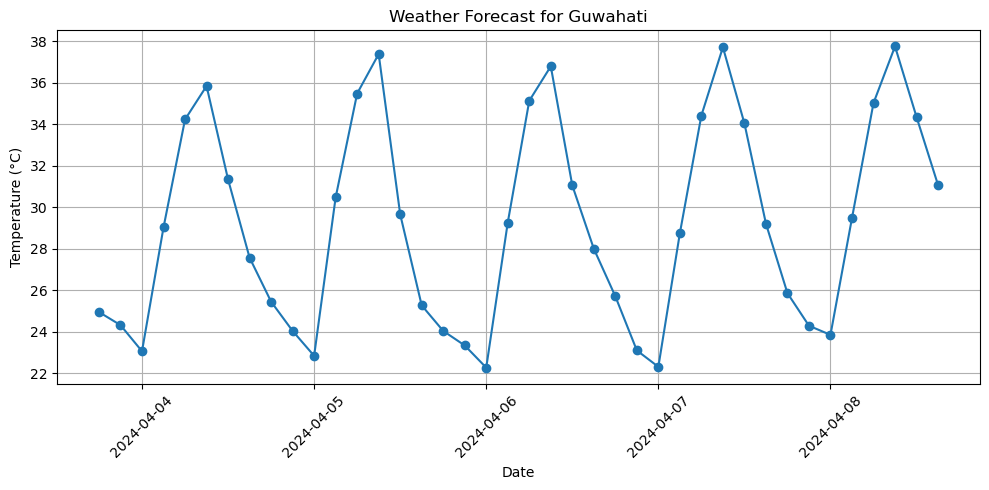

In [2]:
import requests
import json
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

def get_weather(city_name, api_key):
    base_url = "http://api.openweathermap.org/data/2.5/forecast?"
    complete_url = f"{base_url}q={city_name}&appid={api_key}&units=metric"

    response = requests.get(complete_url)
    data = response.json()

    if data["cod"] == "404":
        print("City not found. Please check the city name and try again.")
        return

    try:
        forecasts = data["list"]
    except KeyError:
        print("Unexpected response format. Here's the full response:")
        print(json.dumps(data, indent=4))
        return

    dates = []
    temperatures = []

    for forecast in forecasts:
        date_str = forecast["dt_txt"]
        date = datetime.strptime(date_str, "%Y-%m-%d %H:%M:%S")
        temperature = forecast["main"]["temp"]
        dates.append(date)
        temperatures.append(temperature)

    # Get current weather data
    current_temperature = data["list"][0]["main"]["temp"]
    current_humidity = data["list"][0]["main"]["humidity"]
    current_description = data["list"][0]["weather"][0]["description"]

    # Print current weather
    print(f"Current Weather in {city_name}:")
    print(f"Temperature: {current_temperature}°C")
    print(f"Humidity: {current_humidity}%")
    print(f"Description: {current_description}")

    # Plot forecast graph
    plt.figure(figsize=(10, 5))
    plt.plot(dates, temperatures, marker='o', linestyle='-')
    plt.title(f"Weather Forecast for {city_name}")
    plt.xlabel("Date")
    plt.ylabel("Temperature (°C)")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def main():
    city = input("Enter the city name: ")
    api_key = "c71f76b28a7431d7d42134b45aa88749" # Replace "YOUR_API_KEY" with your OpenWeatherMap API key
    get_weather(city, api_key)

if __name__ == "__main__":
    main()
